 
# Which cryptocurrency will be the next Bitcoin? (Based on historical yearly growth)
 
 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline 

In [2]:
crypto_df = pd.read_csv("CryptocoinsHistoricalPrices.csv")

In [3]:
crypto_df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market.Cap', 'coin', 'Delta'],
      dtype='object')

In [4]:
crypto_df.head()


,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,2018-01-04,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,2018-01-03,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,2018-01-02,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,2018-01-01,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,2017-12-31,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


In [5]:
#determine total number of altcoins
crypto_df["coin"].nunique()

1356

In [6]:
#top 15 Cryptocurrencies with market caps greater than $1Billion
 
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:]

 
top15.head()
 

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,2018-01-04,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,2018-01-03,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,2018-01-02,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,2018-01-01,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,2017-12-31,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


# Historical Growth( Year Over Year with Closing Price of Average /Exponential Slope)

In [7]:
# Saving all my sorted_extracted data to the csv file 
top15.to_csv('./top15.to_csv.csv') 

In [8]:
#Initialize the dataframe with fill in integers(0), so no value will be empty before plotting a chart
# Minor Data Cleanup
YOY_df = pd.DataFrame({"Top15 Coins": ['ADA','BCC','BTC','BTG','DASH',
                                       'EOS','ETC','ETH','LTC','MIOTA',
                                        'NEO','XEM','XLM','XMR','XRP'], 
                                 "2013_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                                 "2014_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                 "2015_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                                 "2016_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                 "2017_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})

YOY_df.head() 

,2013_Average,2014_Average,2015_Average,2016_Average,2017_Average,Top15 Coins
0,0,0,0,0,0,ADA
1,0,0,0,0,0,BCC
2,0,0,0,0,0,BTC
3,0,0,0,0,0,BTG
4,0,0,0,0,0,DASH


In [9]:
#Extracting data with Date, Close and Coin for all the historical years[2013, 2014, 2015, 2016, 2017]
#To plot the graph for the year over year growth.
top15 = top15[["Date", "Close", "coin"]]
top15['Date'] = pd.to_datetime(top15['Date'])

mask = (top15['Date'] > '2012-12-31') & (top15['Date'] <= '2017-12-31')
 
top15 = top15.loc[mask]
top15 = top15.reset_index(drop=True)
 
top15.head()
 
 

,Date,Close,coin
0,2017-12-31,14156.4,BTC
1,2017-12-30,12952.2,BTC
2,2017-12-29,14656.2,BTC
3,2017-12-28,14606.5,BTC
4,2017-12-27,15838.5,BTC


In [10]:
#Formatting dataframe 
top15_2017 = top15[["Date", "Close", "coin"]]
top15_2017['Date'] = pd.to_datetime(top15['Date'])
mask = (top15_2017['Date'] > '2016-12-31') & (top15_2017['Date'] <= '2017-12-31')
top15_2017 = top15_2017.loc[mask]
top15_2017 = top15_2017.reset_index(drop=True)
top15_2017.head()

,Date,Close,coin
0,2017-12-31,14156.4,BTC
1,2017-12-30,12952.2,BTC
2,2017-12-29,14656.2,BTC
3,2017-12-28,14606.5,BTC
4,2017-12-27,15838.5,BTC


In [11]:
#Creating historical volatility dataframe
columns = ['Coin', '2017 Average']
year2017 = pd.DataFrame(columns = columns)

#Calculating volatility values & appending to dataframe
coins = top15_2017.coin.unique()
for coin in coins:
    coin_df = top15_2017.loc[(top15_2017['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2017_sum = round(coin_avg, 2)
    sum2017_avg = sum2017_sum/i
    year2017 = year2017.append({'Coin': coin, 
                                              '2017 Average': sum2017_avg},
                                            ignore_index = True)
year2017 

,Coin,2017 Average
0,BTC,4025.355234
1,XRP,0.204904
2,ETH,225.126584
3,ADA,0.129111
4,XEM,0.180882
5,LTC,50.295069
6,XLM,0.034105
7,MIOTA,1.047550
8,DASH,249.619972
9,NEO,15.527741


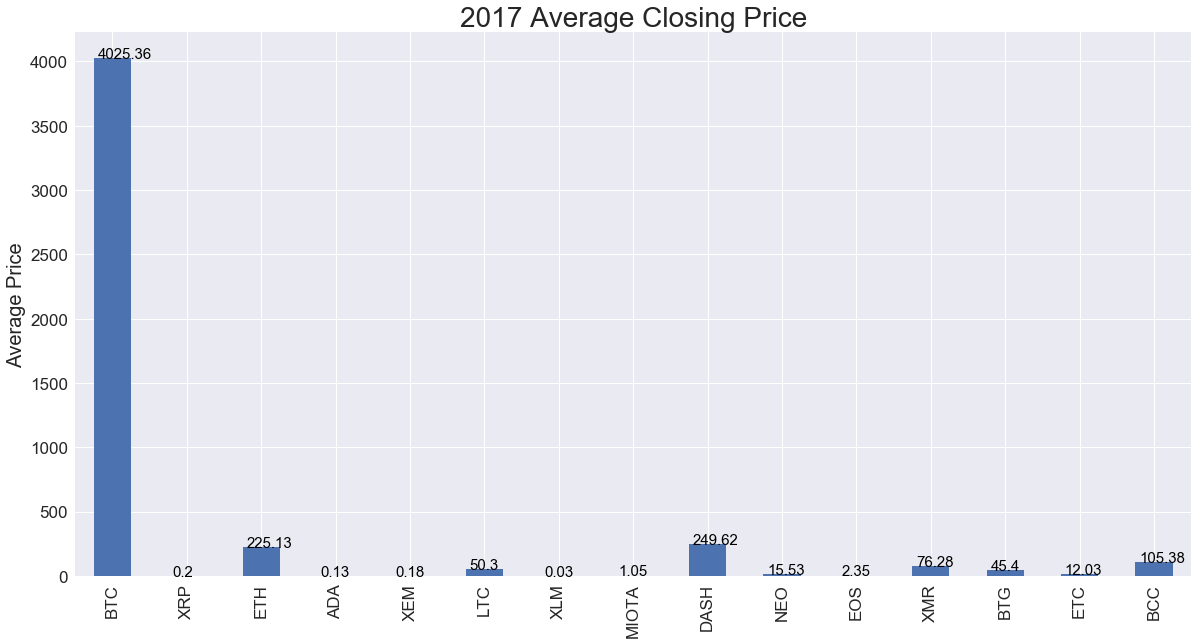

In [25]:
# graph individually to see the growth pattern with year over year growth average of the year 2017
#I am plotting the graph for only 2017 because this is the only year has will all the data for top15 coins.

 
plt.style.use('seaborn')
x = np.arange(15)
year2017.plot(kind = 'bar', x = 'Coin', y = '2017 Average', 
                     legend = False, figsize = (20, 10))
plt.ylabel('Average Price', fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.title('2017 Average Closing Price', fontsize = 28)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
for a,b in zip(x, year2017['2017 Average']):
    b = round(b,2)
    plt.text(a-0.2, b + 1.5, str(b), color='black',fontsize = 15)
plt.show()

# Save the Figure
plt.savefig("2017_Average_Closing_Price.png")

 


In [13]:
#Formatting dataframe 
top15_2016 = top15[["Date", "Close", "coin"]]
top15_2016['Date'] = pd.to_datetime(top15_2016['Date'])
mask = (top15_2016['Date'] > '2015-12-31') & (top15_2016['Date'] <= '2016-12-31')
top15_2016 = top15_2016.loc[mask]
top15_2016 = top15_2016.reset_index(drop=True)
top15_2016.head()

,Date,Close,coin
0,2016-12-31,963.74,BTC
1,2016-12-30,961.24,BTC
2,2016-12-29,973.50,BTC
3,2016-12-28,975.92,BTC
4,2016-12-27,933.20,BTC


In [14]:
#Creating historical volatility dataframe
columns = ['Coin', '2016 Average']
year2016 = pd.DataFrame(columns = columns)

#Calculating volatility values & appending to dataframe
coins = top15_2016.coin.unique()
for coin in coins:
    coin_df = top15_2016.loc[(top15_2016['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2016_sum = round(coin_avg, 2)
    sum2016_avg = sum2016_sum/i
    year2016 = year2016.append({'Coin': coin, 
                                              '2016 Average': sum2016_avg},
                                            ignore_index = True)
year2016 

 

,Coin,2016 Average
0,BTC,570.422500
1,XRP,0.006923
2,ETH,9.829121
3,XEM,0.003379
4,LTC,3.799918
5,XLM,0.002005
6,DASH,8.079093
7,NEO,0.184732
8,XMR,3.707115
9,ETC,1.252453


In [15]:
#Formatting dataframe 
top15_2015 = top15[["Date", "Close", "coin"]]
top15_2015['Date'] = pd.to_datetime(top15_2015['Date'])
mask = (top15_2015['Date'] > '2014-12-31') & (top15_2015['Date'] <= '2015-12-31')
top15_2015 = top15_2015.loc[mask]
top15_2015 = top15_2015.reset_index(drop=True)
top15_2015.head()

,Date,Close,coin
0,2015-12-31,430.57,BTC
1,2015-12-30,426.62,BTC
2,2015-12-29,432.98,BTC
3,2015-12-28,422.28,BTC
4,2015-12-27,422.82,BTC


In [16]:
#Creating historical volatility dataframe
columns = ['Coin', '2015 Average']
year2015 = pd.DataFrame(columns = columns)

#Calculating volatility values & appending to dataframe
coins = top15_2015.coin.unique()
for coin in coins:
    coin_df = top15_2015.loc[(top15_2015['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2015_sum = round(coin_avg, 2)
    sum2015_avg = sum2015_sum/i
    year2015 = year2015.append({'Coin': coin, 
                                              '2015 Average': sum2015_avg},
                                            ignore_index = True)
year2015

 

,Coin,2015 Average
0,BTC,273.088678
1,XRP,0.008843
2,ETH,0.936690
3,XEM,0.000147
4,LTC,2.702121
5,XLM,0.002810
6,DASH,2.768017
7,XMR,0.492039
8,BTG,0.154945


In [17]:
#Formatting dataframe 
top15_2014 = top15[["Date", "Close", "coin"]]
top15_2014['Date'] = pd.to_datetime(top15_2014['Date'])
mask = (top15_2014['Date'] > '2013-12-31') & (top15_2014['Date'] <= '2014-12-31')
top15_2014 = top15_2014.loc[mask]
top15_2014 = top15_2014.reset_index(drop=True)
top15_2014.head()

,Date,Close,coin
0,2014-12-31,320.19,BTC
1,2014-12-30,310.74,BTC
2,2014-12-29,312.67,BTC
3,2014-12-28,317.24,BTC
4,2014-12-27,315.86,BTC


In [18]:
#Creating historical volatility dataframe
columns = ['Coin', '2014 Average']
year2014 = pd.DataFrame(columns = columns)

#Calculating volatility values & appending to dataframe
coins = top15_2014.coin.unique()
for coin in coins:
    coin_df = top15_2014.loc[(top15_2014['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2014_sum = round(coin_avg, 2)
    sum2014_avg = sum2014_sum/i
    year2014 = year2014.append({'Coin': coin, 
                                              '2014 Average': sum2014_avg},
                                            ignore_index = True)
year2014

 

,Coin,2014 Average
0,BTC,528.016474
1,XRP,0.009532
2,LTC,9.831460
3,XLM,0.002721
4,DASH,3.702727
5,XMR,1.562703
6,BTG,1.229107


In [19]:
#Formatting dataframe 
top15_2013 = top15[["Date", "Close", "coin"]]
top15_2013['Date'] = pd.to_datetime(top15_2013['Date'])
mask = (top15_2013['Date'] > '2012-12-31') & (top15_2013['Date'] <= '2013-12-31')
top15_2013 = top15_2013.loc[mask]
top15_2013 = top15_2013.reset_index(drop=True)
top15_2013.head()

,Date,Close,coin
0,2013-12-31,754.01,BTC
1,2013-12-30,756.13,BTC
2,2013-12-29,745.05,BTC
3,2013-12-28,727.83,BTC
4,2013-12-27,735.07,BTC


In [20]:
#Creating historical volatility dataframe
columns = ['Coin', '2013 Average']
year2013 = pd.DataFrame(columns = columns)

#Calculating volatility values & appending to dataframe
coins = top15_2013.coin.unique()
for coin in coins:
    coin_df = top15_2013.loc[(top15_2013['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2013_sum = round(coin_avg, 2)
    sum2013_avg = sum2013_sum/i
    year2013 = year2013.append({'Coin': coin, 
                                              '2013 Average': sum2013_avg},
                                            ignore_index = True)
year2013

 

,Coin,2013 Average
0,BTC,259.022195
1,XRP,0.013716
2,LTC,6.703130
3,BTG,0.490674


In [21]:
# graph individually to see the growth pattern with year over year growth just to play with it.
#plot an individual graph for historic closing price data for each of the 15 cryptocurrencies
#for name, group in top15.groupby("coin"):
   # group.plot(x= "Date", y= "Close", figsize=(15,4))
    #plt.ylabel("Close Price", fontsize = 15)
    #plt.xlabel("Date", fontsize = 15)
    #plt.title(name, fontsize = 15)

In [22]:
#TRied veryhard and spent couple of days for fillining na, removing empty cells and looping with data structures of mutiple, unfortunately does not work. 
# I did not want to waste anymore time, as I need to do the presentation.

#Creating historical average growth year over year dataframe
#YOY_df # initialized dataframe
#columns = ["Top15 Coins", '2013_Average', '2014_Average','2015_Average','2016_Average','2017_Average']

#YOY_df = pd.DataFrame(columns = columns)
#each_year = []
 
    
# Calculate the Average Scores for each year over year for all Top15 coins
#years = ["2013", "2014", "2015", "2016", "2017"] 
#coins = top15.coin.unique()
 
#dataframe = {'Coins': topcoins, 'Year': years} 
#df = pd.DataFrame(dataframe) 

#for coin in coins:
#   coin_df = top15.loc[(top15['coin'] == coin)]
#    coin_df = coin_df.reset_index(drop=True)
#    coin_list = []
    
#    for year in years: 
#        closeprice_lastday_list = []
#        closeprice_firstday_list = []
#        year_list = []
#        year_percent_list = []
#        year_over = []
#        yoy_coin_list = [] 
#        yoy_avg_list = []

 #       start_date = year + '-01-01'
#        end_date = year + '-12-31'

#        mask = (coin_df['Date'] > start_date) & (coin_df['Date'] <= end_date) & (coin_df['coin'] == coin)
#        #print(mask)
#        #print(coin)
        #print(start_date)
        #print(end_date)
#        year_value = 'sum' + year
#        year_sum = year_value + '_sum'
#        year_avg = year_value + '_avg'
        
        
 #       for i, value in enumerate(coin_df['Close'][:-1]):
            #print(i, value)
#            coin_list.append(value)
            
             
             
#        coin_avg = np.sum(coin_list)
#       #print( i)
#        #print(coin_avg)
#        year_sum = round(coin_avg, 2)
#        year_avg = year_sum/i
#       year_title = year + '_Average'
        
#        each_year.append({'Top15 Coins': coin, 
#                          year_title : year_avg})
                           #ignore_index=True)
 

        # Add each value to the appropriate array
#        yoy_coin_list.append(coin_list)
#        yoy_avg_list.append(each_year)
            
 
#    coin_avg = np.sum(coin_list)
    #print( i)
    #print(coin_avg)
#    year_sum = round(coin_avg, 2)
#    year_avg = year_sum/i
    #YOY_df = YOY_df.append({'Top15 Coins': coin, 
                            #year_title : each_year},
                            #ignore_index=True )

 
    
#YOY_df 
#my_list = each_year
#df = pd.DataFrame(np.array(my_list).reshape(15,6), columns = list("abc"))
#print (df)
#df 